## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [578]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

###### Create dataframe `df` from `csv file` with <font color='red'> quick view </font> for its data

In [579]:
#Import data from csv file into a dataframe

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


###### The above result is a <font color='red'> quick view </font> for our `df` dataframe and its data

b. Use the cell below to find the number of rows in the dataset.

In [580]:
df.shape

(294478, 5)

In [581]:
df.shape[0]

294478

In [582]:
print('Number of rows in dataset is "{}"'. format(df.shape[0]))

Number of rows in dataset is "294478"


###### From the above results, our `df` dataframe has `29448` <font color='red'>rows </font> and `5`<font color='red'> columns

c. The number of unique users in the dataset.

In [583]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [584]:
df['user_id'].nunique()

290584

In [585]:
print('Number of rows in dataset is "{}"'. format(df['user_id'].nunique()))

Number of rows in dataset is "290584"


###### From the above results, our `df` dataframe has `290584` unique `user id`

d. The proportion of users converted.

In [586]:
# proporion of all user rows
mean_1 = df['converted'].mean()
mean_1

0.11965919355605512

In [587]:
# proporion of unique user rows
df.groupby('converted')['user_id'].nunique()/df['user_id'].nunique()

converted
0    0.881931
1    0.121042
Name: user_id, dtype: float64

In [588]:
# proporion of unique user rows
mean_2 = df.query('converted == 1')['user_id'].nunique()/df['user_id'].nunique()
mean_2

0.12104245244060237

###### From the above results, the proportion converted users driven<font color='red'> from overall data </font> is `11.9 %` and the propotion of converted uders driven <font color='red'>only from unique rows</font> data is `12.1 %`  

e. The number of times the `new_page` and `treatment` don't match.

###### To get number of raws when `new_page && treatment` don't match <font color='red'>is as same as </font> the raws when the number of `new_page && control` and `old_page && treatment` and `old_page && control` occures

In [589]:
df_a = df.query( 'group == "control" and landing_page == "new_page"')
df_a.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1


###### From the above result is a <font color='red'> new `df_a` dataframe </font> with only rows contains</font>  `new_page && control`  pairs

In [590]:
df_b = df.query( 'group == "treatment" and landing_page == "old_page"')
df_b.head()

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0


###### From the above result is a <font color='red'> new `df_b` dataframe </font> with only rows contains</font>  `old_page && treatment`  pairs

In [591]:
df_c = df.query( 'group == "control" and landing_page == "old_page"')
df_c.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


###### From the above result is a <font color='red'> new `df_c` dataframe </font> with only rows contains</font>  `old_page && control`  pairs

In [592]:
df_a.shape[0]+df_b.shape[0]+df_c.shape[0]


149167

###### From the above results, <font color='red'> the sum of rows number </font> when `new_page && treatment` not matched is `149167` 

f. Do any of the rows have missing values?

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [594]:
(df.isnull() == True).sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

###### From the above results, there is no <font color='red'> null values </font> in our dataset

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

###### To get a dataframe where `new_page && treatment` or `old_page && control` don't match <font color='red'>is as same as </font> the raws when the number of `new_page && control` and `old_page && treatment` and  occures.

###### From Quiz2  <font color='red'> remove all rows </font> when `old_page && treatment` or `new_page && control`  <br> and <font color='red'>create new `df2` dataframe with only rows contains</font>  `new_page && treatment` or `old_page && control` pairs

In [595]:
df_d = df.query( 'group == "treatment" and landing_page == "new_page"')
df_d.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


###### From the above result is a <font color='red'> new `df_d` dataframe </font> with only rows contains</font>  `new_page && treatment`  pairs

In [596]:
df_c.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


###### From the above result is a <font color='red'> `df_c` dataframe created earlier </font> with only rows contains `old_page && control`  pairs

In [597]:
df2 = pd.concat([df_d, df_c], axis=0)
df2.shape

(290585, 5)

###### From the above result is a <font color='red'> new `df2` dataframe created by merging two dataframes </font> `df_d` and `df_c`

In [598]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [599]:
df2.tail()

,user_id,timestamp,group,landing_page,converted
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [600]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [601]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [602]:
df2['user_id'].count()

290585

###### From the above results, our `df2` dataframe has `290585` rows count `user id`

In [603]:
df2['user_id'].nunique()

290584

###### From the above results, our `df2` dataframe has `290584` unique `user id`

b. There is one **user_id** repeated in **df2**.  What is it?

In [604]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


###### From the above results, our `df2` dataframe has ` a duplicated rows `  with `user id` equal to `773192`

c. What is the row information for the repeat **user_id**? 

In [605]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


###### From the above results, our `df2` dataframe has ` two duplicated rows `  with `user id` equal to `773192` with indices `1899` and `2893`

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [606]:
df2.drop(labels=2893, axis=0, inplace=True)

In [607]:
df2['user_id'].count()

290584

###### From the above results, our `df2` dataframe has `290584` rows count `user id`

In [608]:
df2['user_id'].nunique()

290584

###### From the above results, our `df2` dataframe has `290584` unique `user id`

In [609]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


###### From the above results, our `df2` dataframe has <font color='red'> no duplicated rows</font>  in `user id` column

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [610]:
df2['converted'].mean()

0.11959708724499628

In [611]:
print(100*'=')
print('Probability of an individual converting regardless of the page they receive is "{} %"'. format(round(float(df2['converted'].mean()*100),2)))
print(100*'=')

Probability of an individual converting regardless of the page they receive is "11.96 %"


b. Given that an individual was in the `control` group, what is the probability they converted?

In [612]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

In [613]:
print(100*'=')
print('Probability of an individual converting while they were control group is "{} %"'. format(round(float(df2.query('group == "control"')['converted'].mean()*100),2)))
print(100*'=')

Probability of an individual converting while they were control group is "12.04 %"


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [614]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

In [615]:
print(100*'=')
print('Probability of an individual converting while they were treatment group is "{} %"'. format(round(float(df2[df2['group'] == 'treatment']['converted'].mean()*100),2)))
print(100*'=')

Probability of an individual converting while they were treatment group is "11.88 %"


d. What is the probability that an individual received the new page?

In [616]:
len(df2[df2['landing_page'] == 'new_page']) / len(df2)

0.5000619442226688

In [617]:
print(100*'=')
print('Probability of an individual received the new page is: "{} %"'. format(round(float(len(df2[df2['landing_page'] == 'new_page']) / len(df2)*100),2)))
print(100*'=')

Probability of an individual received the new page is: "50.01 %"


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

#### From the above results , The converted rate of individuals  <font color='red'> regardless the group </font> is `12%` , where the converted rate of the <font color='red'> treatment group </font> is approximately as same as the converted rate of the <font color='red'> control group </font> , which is also approximately `12%`.,,,,,,,, Therefor, we have no suffient evidence to  to conclude that the new treatment page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

###### Null hypothese: The old page has an  <font color='red'> equal or higher </font>  population conversion rate than the new page
><font color='red'> **$H_{0}$** : **$P_{old}$** >= **$P_{new}$** </font>
###### Alternative hypothese: The old page has a  <font color='red'> lower </font>  population conversion rate than the new page
><font color='red'> **$H_{1}$** : **$P_{old}$** < **$P_{new}$**</font>


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [618]:
p_new_null = df2['converted'].mean()
print(55*'=')
print('Probability of conversion for new page is: "{} %"'. format(round(float(p_new_null*100),2)))
print(55*'=')

Probability of conversion for new page is: "11.96 %"


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [619]:
p_old_null = df2['converted'].mean()
print(55*'=')
print('Probability of conversion for new page is: "{} %"'. format(round(float(p_old_null*100),2)))
print(55*'=')

Probability of conversion for new page is: "11.96 %"


c. What is $n_{new}$, the number of individuals in the treatment group?

In [620]:
n_new = df2.query('landing_page == "new_page"').shape[0]
print(65*'=')
print('The number of individuals in the treatment group is: "{}"'. format(n_new))
print(65*'=')

The number of individuals in the treatment group is: "145310"


d. What is $n_{old}$, the number of individuals in the control group?

In [621]:
n_old = df2.query('landing_page == "old_page"').shape[0]
print(65*'=')
print('The number of individuals in the treatment group is: "{}"'. format(n_old))
print(65*'=')

The number of individuals in the treatment group is: "145274"


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [622]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new_null, 1-p_new_null] , replace=True)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [623]:
new_page_converted.mean()

0.12072121670910467

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [624]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old_null, 1-p_old_null], replace=True)
old_page_converted

array([1, 0, 0, ..., 0, 0, 0])

In [625]:
old_page_converted.mean()


0.12017979817448408

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [626]:
new_page_converted.mean() - old_page_converted.mean()


0.00054141853462058576

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [627]:
p_diffs = []
for _ in range(10000):
    new_page_converted_simulation = np.random.choice([1, 0], size=n_new, p=[p_new_null, 1-p_new_null] , replace=True)
    old_page_converted_simulation = np.random.choice([1, 0], size=n_old, p=[p_old_null, 1-p_old_null] , replace=True)
    p_diffs.append(new_page_converted_simulation.mean() - old_page_converted_simulation.mean())
p_diffs = np.array(p_diffs)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

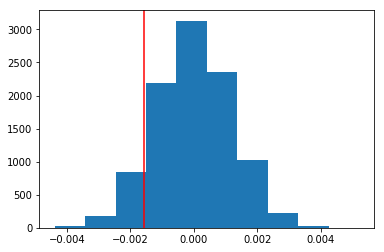

In [628]:
plt.hist(p_diffs)
actual_diff = df2.query('group == "treatment"')['converted'].mean(
) - df2.query('group == "control"')['converted'].mean()

plt.axvline(x=actual_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [629]:
p_val = (p_diffs > actual_diff).mean()
p_val

0.90410000000000001

In [630]:
print("Actual difference: {}". format(np.mean(p_diffs)))

print('Proportion greater than actual difference is: "{}" %'. format(p_val*100))

Actual difference: -1.5165290144628012e-05
Proportion greater than actual difference is: "90.41" %


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

###### It appears that the <font color='red'> p-value </font> is `above 0.05`, which means we <font color='red'> do not have evidence to reject the null hypothesis </font> whish states that value of `new page converted equal to value of old page converted` , and it means that there is no difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [631]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)


convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [632]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new])
print("z-score:", z_score)
print("p_value:", p_value)


z-score: 1.31092419842
p_value: 0.189883374482


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

###### The `p-value` is roughly `19.0%` which is <font color='red'> not below </font> the type 1 error `alpha` of `0.05`. this is <font color='red'> not enough evidence to reject the null hypothesis </font> and it means that the converted rate for new page and old page have no difference. This result is the same as parts J. and K. result.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

###### <font color='red'> will use `Logistic regression.`</font>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [633]:
df3 = df2
df3['intercept'] = 1
df3[['drop', 'ab_page']] = pd.get_dummies(df3['group'])
df3.drop('drop', axis=1, inplace=True)
df3.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [634]:
model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [635]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-09 13:36 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

###### The `p-value` associated with `ab_page` is `18.89%` here, which is <font color='red'> differnet but approximatly equal </font> to the previously calculated value `19% `, this occures because of diffrencies in the hypotheses
###### In part II
> null : **$H_{0}$** : **$P_{old}$** >= **$P_{new}$**

> alternative: **$H_{1}$** : **$P_{old}$** < **$P_{new}$**
###### In part III
> null : **$H_{0}$** : **$P_{old}$** = **$P_{new}$**

> alternative: **$H_{1}$** : **$P_{old}$** != **$P_{new}$**
###### <font color='red'> However,</font> this `p-value` is still higher than `alpha` `type 1 error` threshold `0.05` to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

###### Tll this point of testing and analysis , the <font color='red'> treatment or control page </font> has no much impact on whether a user converts. Therefore, we should use other factors that might predict and impact conversion. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [636]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [637]:
df4 = df2.join(df_country.set_index('user_id'),on='user_id')
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [638]:
df4[['CA', 'UK', 'US']] = pd.get_dummies(df4['country'])
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [639]:
df4['intercept'] = 1
logit_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page','CA','UK']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-09 13:36 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

<a id='conclusion'></a>
## <font color='red'> #Conclusion</font>

**In this testing, we wanted to find out if the landing new page would make higher convertion rate from old page or not, we used hypothesis testing.**

**The null hypothesis was that the old landing page has the same or even higher converted rate than the new page.**

**The alternative hypothesis was that the old landing page has lower converted rate than the new page.**

**In order to get the result, we performed an A-B test by using simulating data samples and by calculating the P-value.**

**Same conclusions from both partII and partIII , the null hypothesis wins, which means that the landing page do not have an 
effect on the convertion rate.**

**After that the regression approach was used , by using logistic regression model to investegte whether there is a conversion or no conversion**

**p-value is different from what we got in the A/B test , but all results agreed that we will go with the null hypothesis.**


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [640]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0